## Business problems
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business objectives
A linear model is required to predict the demand for shared bikes with the available independent variables. The management need to understand the demands vary with different features.

## Data preparation and cleansing
### Import neccessary packages

Although in Python we can import packages anywhere we want, as long as it's prior the use, it'd be better to keep all of neccessary packages in one place. It's easer for reference.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# neccessary packages for data analysis
import numpy as np
import pandas as pd

# packages for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# packages for data partition and normalisation.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# package for linear regression
import statsmodels.api as sm

# package for detecting variance inflation factor. It's useful to detect overfiting.
from statsmodels.stats.outliers_influence import variance_inflation_factor

#package to calculate r2 score
from sklearn.metrics import r2_score

### Exploratory Data Analysis
#### Import dataset from current working folder 

In [2]:
data = pd.read_csv("day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### determining dataset dimension

In [4]:
data.shape

(730, 16)

#### Drop unnecessary columns

Because there is 16 columns, let's see if there is any null columns

In [5]:
(data.isnull().sum() == len(data)).sum()

0

Since there is no null columns, and the column instant is just the record index. Following columns are removed:
* **instant**: it's record index
* both **casual** and **registered**: as _cnt_ variable is a result of addition those two variables. Adding those two will lead to strong multicollinearity


After removing those columns, we can see the data info.

In [6]:
data = data.drop(labels=["instant", "casual", "registered"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


### Data transformation
#### Formatting date in string format to numerical format.

In the dataset, the orginal variable dteday is in string format dd-mm-YYYY. It's good to format it from string to date time and then parse it to numeric variable. Since we are building linear regression, and in term "linear", date may or may not hold important information (which is trend). Therefore, numeric is essential.

Besides, it's also good to create another variables combining both year and month into once. This varible is used to determine if there is any difference in term of seasonal coefficience.

In [7]:
# converting dteday to date value, then converting once more to numeric data, so we can use later on the model.
data['year_month'] = pd.to_datetime(data["dteday"], format='%d-%m-%Y').dt.strftime('%Y-%m')
data["dteday"] = pd.to_numeric(pd.DatetimeIndex(pd.to_datetime(data["dteday"], format='%d-%m-%Y')))
data.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,7.300000e+02,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,1.546258e+18,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.821978e+16,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.514765e+18,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,1.530511e+18,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,1.546258e+18,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.562004e+18,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.577750e+18,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### De-coding numeric varibles into categorical variables

There are some categorical variables have been already coded to numeric values. In this EDA step, we need to de-code it to categorical. Those variables are used to determine if they have any impacts on outcome variable.

In [8]:
# changing some numeric based variables (which are actually categorical variables) back to categorical variables.
data['season']=data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
data['weathersit']=data['weathersit'].map({1: 'Clear', 2: 'Mist',3:'Light snow', 4:'Heavy Rain' })
data['holiday']=data['holiday'].map({0: 'No', 1: 'Yes' })
data['workingday']=data['workingday'].map({0: 'No', 1: 'Yes' })
data['weekday']=data['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday' })
data['mnth']=data['mnth'].map({1: 'Jan'
                               , 2: 'Feb'
                               , 3: 'Mar'
                               , 4: 'April'
                               , 5: 'May'
                               , 6: 'Jun'
                               , 7: 'Jul'
                               , 8: 'Aug'
                               , 9: 'Sep'
                               , 10: 'Oct'
                               , 11: 'Nov'
                               , 12: 'Dec'
                              })
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year_month
0,1514764800000000000,spring,0,Jan,No,Saturday,No,Mist,14.110847,18.18125,80.5833,10.749882,985,2018-01
1,1514851200000000000,spring,0,Jan,No,Sunday,No,Mist,14.902598,17.68695,69.6087,16.652113,801,2018-01
2,1514937600000000000,spring,0,Jan,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018-01
3,1515024000000000000,spring,0,Jan,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018-01
4,1515110400000000000,spring,0,Jan,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018-01


### Visualisation
#### Visualising Categorical Variables

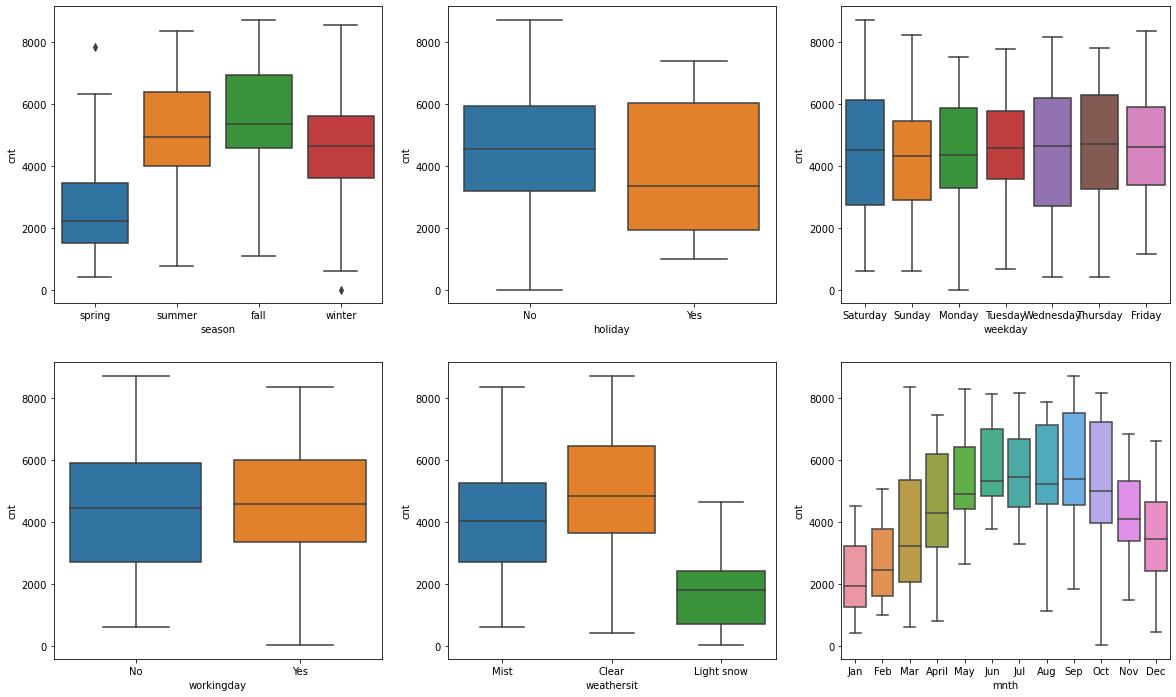

In [9]:

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)

plt.show()

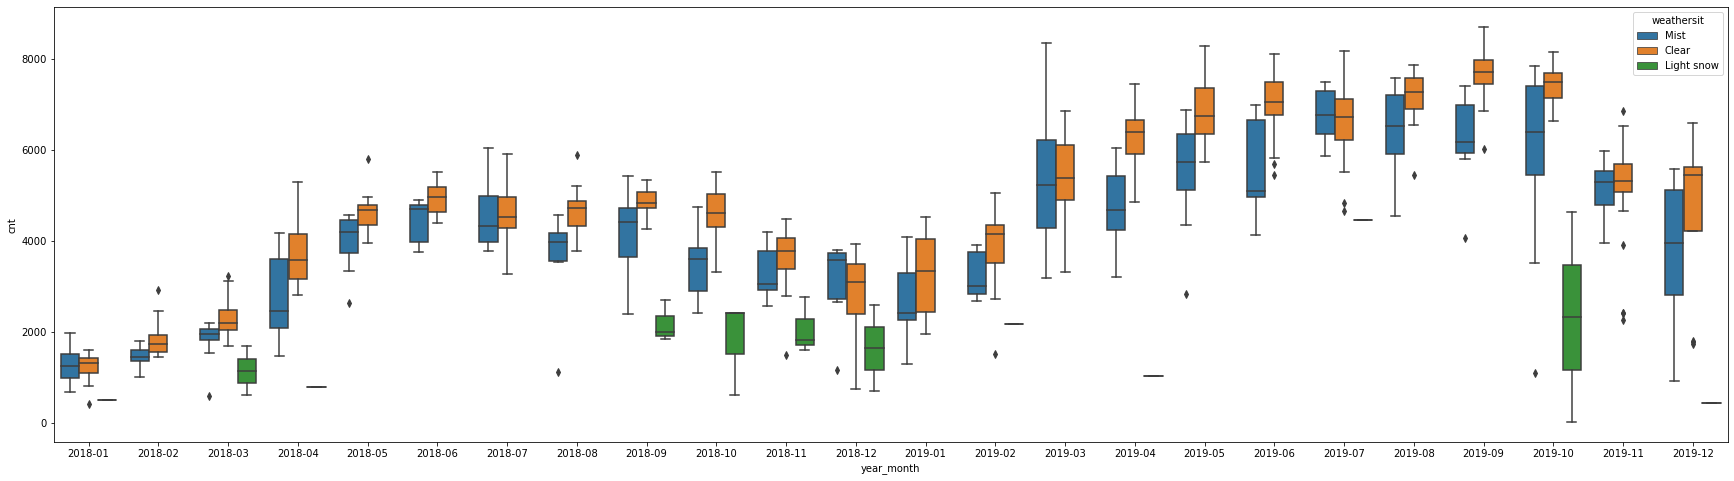

In [10]:
plt.figure(figsize = (30, 8))
sns.boxplot(x = 'year_month', y = 'cnt', hue = 'weathersit', data = data)
plt.show()

#### Pair-correlation

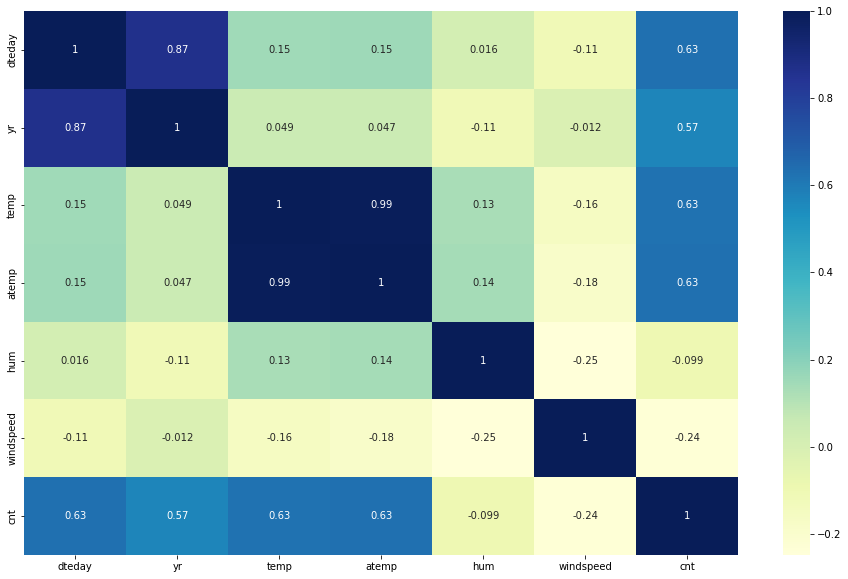

In [11]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Following variables are selected for final dataset
* Numerical variables
    * cnt
        * this is the indenpendent variable
    * dteday (after adjusted)
        * high correlation to independent variable
    * yr
        * high correlation to independent variable
    * atemp
        * high correlation to independent variable
* Categorical variables
    * weathersit
    * season
    * mnth

### Following variables are not selected
* Numerical variables
    * temp 
        * high correlation to atemp which is also included. Adding this variable may cause to multicollinearity
* Categorical variables 
    * workingday
    * weekday
    * holiday
        * Those three variables are not selected due to no statistical significane difference between each variables in term of independent variables.
    

## Preparing final dataset before training
### Creating dummies variables

For the categorical variable weathersit, it's not good to drop first column, as there are only 3 cardinalities in this dataset while in fact it should has 4. Therefore, drop first column may lead to misunderstanding.

In [12]:
weathersit = pd.get_dummies(data['weathersit'], drop_first = True)
weathersit

,Light snow,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


Whereas, variable seaon is good enough to drop first column as it has full 4 cardinalities as described in data dictionary

In [13]:
season = pd.get_dummies(data['season'], drop_first = True)
season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [14]:
month = pd.get_dummies(data['mnth'], drop_first = True)
month

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


### Consolidating numerical variables into dummies variables

In [15]:
final_data = pd.concat([data[['cnt', 'atemp', 'dteday', 'yr']], weathersit, season, month], axis = 1)
final_data.head()

,cnt,atemp,dteday,yr,Light snow,Mist,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,985,18.18125,1514764800000000000,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,801,17.68695,1514851200000000000,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1349,9.47025,1514937600000000000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1562,10.60610,1515024000000000000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1600,11.46350,1515110400000000000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


# Training model
## Spliting train and test data set

In [16]:
np.random.seed(1406) ## it's my favorite to use current date as seed :D
df_train, df_test = train_test_split(final_data, train_size = 0.7, test_size = 0.3, random_state = 100)

Let's check if the size of train and test dataset are 70% and 30%

In [17]:
df_train.shape

(510, 20)

In [18]:
df_test.shape

(219, 20)

It seems the split work well

## Rescaling variables

Normally, I would prefer to use standardization to scale variables. I have never use normalisation, so I think it's time to experience the new method. Normalisation method is used to rescall all variables except dummy variabies

In [19]:
scaler = MinMaxScaler()

num_vars = ['cnt', 'atemp', 'dteday']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,cnt,atemp,dteday,yr,Light snow,Mist,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,0.864243,0.501133,0.896978,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
576,0.827658,0.766351,0.791209,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,0.465255,0.438975,0.585165,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
728,0.204096,0.200348,1.000000,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
482,0.482973,0.391735,0.662088,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


It's always good to validate if the scaler works

In [20]:
df_train.describe()

,cnt,atemp,dteday,yr,Light snow,Mist,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513620,0.512989,0.505414,0.507843,0.029412,0.343137,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.224593,0.212385,0.288281,0.500429,0.169124,0.475223,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356420,0.332086,0.255838,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.518638,0.526811,0.510989,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.684710,0.688457,0.759272,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Perfect, it works. The min and max of all variables are 0 and 1 respectively. By right, after we scale variables, it shouldn't affect the correlation between variables as we did ealier. Again, we need to be ensured.

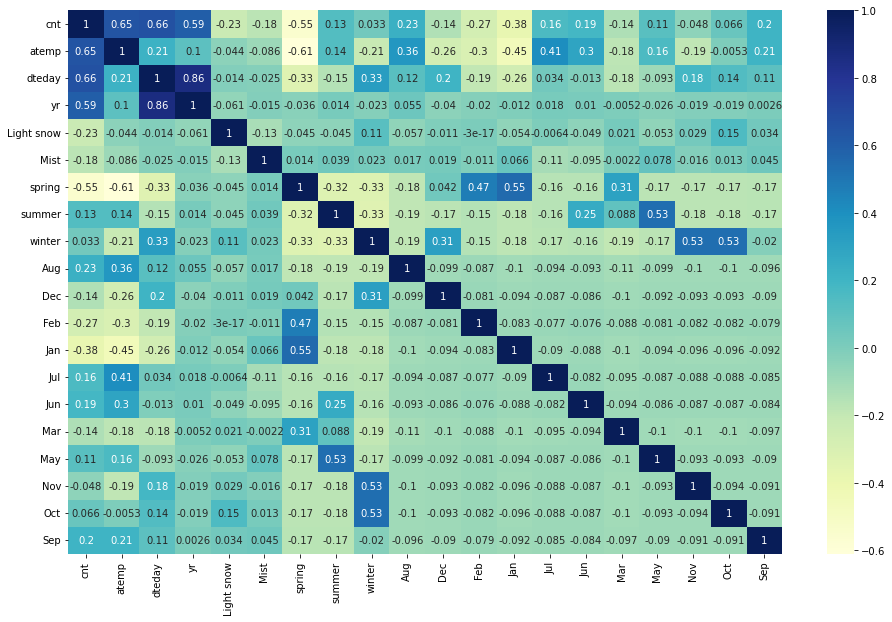

In [21]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

There is no difference in this corplot and the previous one. So we are ensured that the scaler doesn't have any side impact. It's safe to start building models now.

## Building linear models
### One independent variables with cnt

Perhaps, a simple model with the highest correlation score between dependent variables and independent varible. In this case, they are cnt and registered.

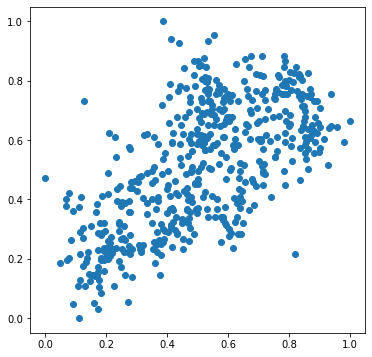

In [22]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.cnt, df_train.atemp)
plt.show()

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train

In [24]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

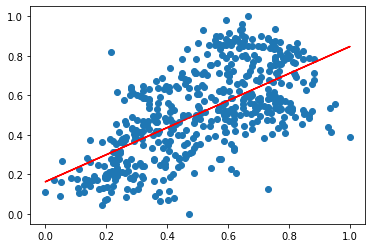

In [25]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], lr.params.const + lr.params.atemp * X_train_lm.iloc[:, 1], 'r')
plt.show()

In [26]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.10e-61
Time:                        23:43:00   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

Because the R-squared is only 0.418, new model with new added variables are under consideration.

### Adding one more variable

The next variable is dteday. This variable is also high correlation with cnt variable. Let's see if the new model explain more variance data.

In [27]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp', 'dteday']])

# Create a new fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     595.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          8.99e-134
Time:                        23:43:00   Log-Likelihood:                 346.67
No. Observations:                 510   AIC:                            -687.3
Df Residuals:                     507   BIC:                            -674.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0117      0.016      0.742      0.4

In [28]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp'
                                      , 'dteday'
                                      , 'yr']])

# Create a new fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.031108
atemp     0.583767
dteday    0.242386
yr        0.119211
dtype: float64

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     431.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.42e-139
Time:                        23:43:00   Log-Likelihood:                 362.14
No. Observations:                 510   AIC:                            -716.3
Df Residuals:                     506   BIC:                            -699.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0311      0.016      1.975      0.0

Perfect, yr variable make the R-squared increase a bit. Let's see if more varibles (mostly are seasons related, month related).

### Adding more variables and removing one by one based on p-value

In [30]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp'
                                      , 'dteday'
                                      , 'yr'
                                      , 'spring'
                                      , 'Jan'
                                      , 'Feb'
                                      , 'Aug'
                                      , 'Sep'
                                     ]])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     186.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.08e-145
Time:                        23:43:00   Log-Likelihood:                 390.32
No. Observations:                 510   AIC:                            -762.6
Df Residuals:                     501   BIC:                            -724.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1998      0.029      6.999      0.0

R-squared increases from 0.696 to 0.748, which is also good. As we can see, there are some variables have p-value > 0.05. Normally, at this stage, I will drop one column at a time to see any updates on model.

#### Removing Aug
Aug is firstly remove because it has the highest p-value.

In [31]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp'
                                      , 'dteday'
                                      , 'yr'
                                      , 'spring'
                                      , 'Jan'
                                      , 'Feb'
                                      , 'Sep'
                                     ]])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.58e-146
Time:                        23:43:00   Log-Likelihood:                 390.23
No. Observations:                 510   AIC:                            -764.5
Df Residuals:                     502   BIC:                            -730.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1965      0.027      7.155      0.0

Removing Aug doesn't change R-squared as well as other metrics. 
#### Removing Feb

In [32]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp'
                                      , 'dteday'
                                      , 'yr'
                                      , 'spring'
                                      , 'Jan'
                                      , 'Sep'
                                     ]])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     248.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          7.48e-147
Time:                        23:43:00   Log-Likelihood:                 389.59
No. Observations:                 510   AIC:                            -765.2
Df Residuals:                     503   BIC:                            -735.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1879      0.026      7.124      0.0

Now, the R-squared decrease a bit from 0.787 to 0.786, which is very little. 
#### Removing Jan

In [33]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp'
                                      , 'dteday'
                                      , 'yr'
                                      , 'spring'
                                      , 'Sep'
                                     ]])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     296.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.31e-147
Time:                        23:43:00   Log-Likelihood:                 388.42
No. Observations:                 510   AIC:                            -764.8
Df Residuals:                     504   BIC:                            -739.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1752      0.025      6.993      0.0

#### Removing dteday

In [34]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp'
                                      , 'yr'
                                      , 'spring'
                                      , 'Sep'
                                     ]])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     370.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.31e-148
Time:                        23:43:00   Log-Likelihood:                 387.69
No. Observations:                 510   AIC:                            -765.4
Df Residuals:                     505   BIC:                            -744.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1951      0.019     10.367      0.0

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[['atemp', 'yr', 'spring', 'Sep']].columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train[['atemp', 'yr', 'spring', 'Sep']].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,yr,920.13
2,spring,351.80
0,atemp,30.90
3,Sep,1.09


After all months which have the highest correlation among months, there is no much changes in R-squared. So, high correlation variables may not have additional affect on the final model.

#### Final model using p-value method

In [36]:
## assigning temp result to final variable model.
p_value_method = lr
p_value_method_X_train_lm = X_train_lm

### Adding more variables and removing one by one based on VIF

In [37]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.20e-172
Time:                        23:43:00   Log-Likelihood:                 483.81
No. Observations:                 510   AIC:                            -927.6
Df Residuals:                     490   BIC:                            -842.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2331      0.065      3.581      0.0

Even all variables are added, the R-squared doesn't increase much. Besides, it leads to multicollinearity problems. Now we need to examine VIF to remove columns.

In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,dteday,920.13
2,yr,351.80
9,Dec,42.69
16,Nov,37.97
0,atemp,30.90
17,Oct,29.91
18,Sep,20.73
8,Aug,19.71
5,spring,12.22
12,Jul,12.03


#### Removing dteday

In [39]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('dteday', 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.81e-173
Time:                        23:43:00   Log-Likelihood:                 483.72
No. Observations:                 510   AIC:                            -929.4
Df Residuals:                     491   BIC:                            -849.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2131      0.041      5.216      0.0

In [40]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,22.92
6,winter,11.36
4,spring,10.41
16,Oct,5.73
15,Nov,5.19
7,Aug,4.89
5,summer,4.77
11,Jul,4.63
10,Jan,4.47
8,Dec,4.06


#### Removing summer

In [41]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('summer', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          5.96e-174
Time:                        23:43:00   Log-Likelihood:                 483.52
No. Observations:                 510   AIC:                            -931.0
Df Residuals:                     492   BIC:                            -854.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2324      0.027      8.555      0.0

In [42]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,13.08
5,winter,10.53
4,spring,8.06
15,Oct,5.59
14,Nov,5.16
9,Jan,4.20
7,Dec,4.05
8,Feb,3.47
6,Aug,3.01
12,Mar,2.99


#### Removing atemp

In [43]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('atemp', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     122.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.11e-160
Time:                        23:43:00   Log-Likelihood:                 448.02
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     493   BIC:                            -790.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4189      0.017     24.039      0.0

In [44]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,winter,10.53
3,spring,8.05
14,Oct,4.81
13,Nov,4.74
8,Jan,4.11
6,Dec,3.76
7,Feb,3.32
11,Mar,2.51
0,yr,1.85
2,Mist,1.55


#### Removing winter

In [45]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('winter', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     127.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.61e-159
Time:                        23:43:00   Log-Likelihood:                 442.66
No. Observations:                 510   AIC:                            -853.3
Df Residuals:                     494   BIC:                            -785.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4182      0.018     23.776      0.0

In [46]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,spring,6.05
7,Jan,3.40
6,Feb,2.79
10,Mar,2.19
0,yr,1.85
2,Mist,1.55
5,Dec,1.32
4,Aug,1.17
13,Oct,1.17
14,Sep,1.15


#### Removing spring

In [47]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('spring', 1)

# Build a new fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     125.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.07e-152
Time:                        23:43:00   Log-Likelihood:                 424.89
No. Observations:                 510   AIC:                            -819.8
Df Residuals:                     495   BIC:                            -756.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4162      0.018     22.881      0.0

In [48]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.85
2,Mist,1.54
3,Aug,1.17
12,Oct,1.17
6,Jan,1.15
9,Mar,1.15
13,Sep,1.15
10,May,1.14
11,Nov,1.12
4,Dec,1.11


#### Final model using VIF method

In [49]:
vif_method = lr_3
vif_X_train_lm = X_train_lm

## Comparing both methods
### In R-squared perspective

In [50]:
### p-value method
print(p_value_method.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     370.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.31e-148
Time:                        23:43:01   Log-Likelihood:                 387.69
No. Observations:                 510   AIC:                            -765.4
Df Residuals:                     505   BIC:                            -744.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1951      0.019     10.367      0.0

In [51]:
### VIF method
print(vif_method.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     125.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.07e-152
Time:                        23:43:01   Log-Likelihood:                 424.89
No. Observations:                 510   AIC:                            -819.8
Df Residuals:                     495   BIC:                            -756.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4162      0.018     22.881      0.0

Obersing both methods, the removing variables solely used p-value method doesn't have as good result as VIF method, but the final model uses less variables, 4 variables compared to 14 variables.

10 additional variables in VIF method only result in 0.04 R-squared. In my opinion, a good model uses less variables, but the final result doesn't change much.

### In residual perspective

Text(0.5, 0, 'Errors')

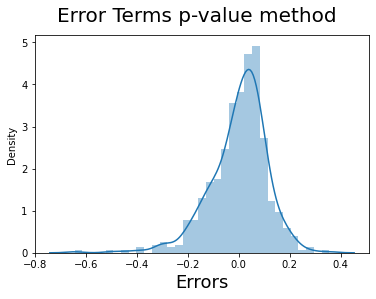

In [52]:
p_value_cnt = p_value_method.predict(p_value_method_X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - p_value_cnt))

# Plot heading 
fig.suptitle('Error Terms p-value method', fontsize = 20)

# X-label
plt.xlabel('Errors', fontsize = 18)                         

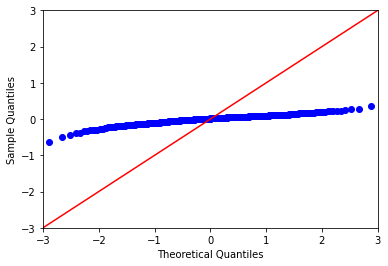

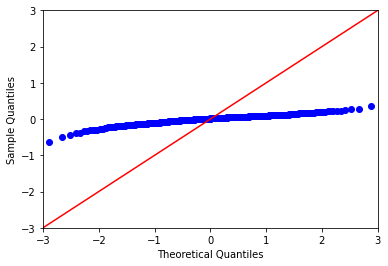

In [53]:
sm.qqplot(y_train - p_value_cnt, line ='45')

As observed in histogram and Q-Q plot, the residual is heavy tailed. Perhaps there is some mistake in the training model.

Text(0.5, 0, 'Errors')

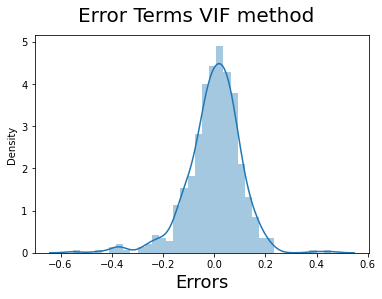

In [54]:
vif_cnt = vif_method.predict(vif_X_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - vif_cnt))

# Plot heading 
fig.suptitle('Error Terms VIF method', fontsize = 20)         

# X-label
plt.xlabel('Errors', fontsize = 18)           

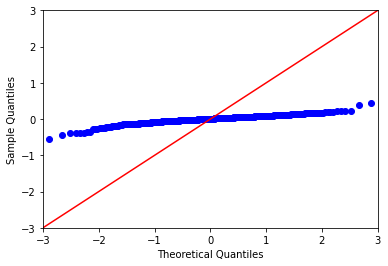

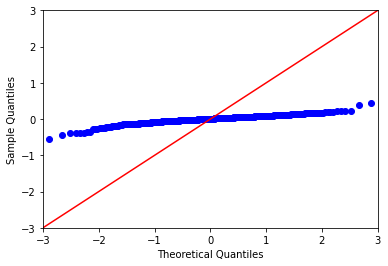

In [55]:
sm.qqplot(y_train - vif_cnt, line ='45')

Similarity, it's heavy tailed. I will Google for more information about that.

Both models' residuals are normal distribution with the peak at 0. Therefore, both models are very best fit. Either models works, and there are no significant difference between those two model. The model eiliminating variables using p-value is chosen for futher evaluation.

# Evaluating model

## Rescaling variables on test data

In [56]:
num_vars = ['cnt', 'atemp', 'yr']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [57]:
df_test.describe()

,cnt,atemp,dteday,yr,Light snow,Mist,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,2.190000e+02,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.516216,0.530942,1.545504e+18,0.479452,0.027397,0.319635,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.238702,0.228159,1.846067e+16,0.500722,0.163612,0.467403,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,1.515024e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359882,0.333829,1.529453e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.520241,0.547913,1.544832e+18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.682487,0.720622,1.561118e+18,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.577750e+18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Seperating output columns from test data

In [58]:
y_test = df_test.pop('cnt')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [59]:
X_test_m4 = X_test_m4[['const', 'atemp', 'yr', 'spring', 'Sep']]
X_test_m4.head()

,const,atemp,yr,spring,Sep
184,1.0,0.778767,0.0,0,0
535,1.0,0.855132,1.0,0,0
299,1.0,0.492359,0.0,0,0
221,1.0,0.805661,0.0,0,0
152,1.0,0.749249,0.0,0,0


In [60]:
y_pred_m4 = p_value_method.predict(X_test_m4)

## Evaluating model

Text(0, 0.5, 'y_pred')

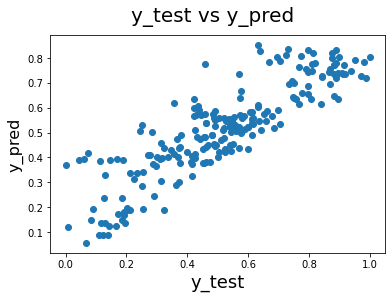

In [61]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Let's validate the R-squared on the test set

In [62]:
r2_score(y_test, y_pred_m4)

0.7475945538151212

Recall the R-squared on the train set is 0.746. We can say that the model is persistent as the R-squared in both train and test set are almost identical.

## Final result

The final model is: __cnt = 0.1951 + 0.4382 * atemp + 0.2417 * yr - 0.1383 * spring + 0.0579 * Sep__

How to interpret this equation:
* A single unit increase in atemp (feeling temperature in Celsius) results in incrase 0.63 unit in bike sharing demands, given all other factor remain unchanged.
* Assuming all variables increases by 1 unit, the total bike sharing demands increase by 1.3 unit.